In [221]:
#Importing dataframes for analysis
import pandas as pd
import numpy as np
companies = pd.read_csv("C:/Users/Shashank\Downloads\IIIB AIML\Investment Assignment Assignment\companies.txt", delimiter = "\t", encoding = 'unicode_escape')
rounds2 = pd.read_csv("C:/Users/Shashank/Downloads/IIIB AIML/Investment Assignment Assignment/rounds2.csv",header=0,encoding = 'unicode_escape')
#rounds2.head()
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [196]:
#getting unique company names from rounds2.csv
import pandas as pd
import numpy as np
a = rounds2.company_permalink.str.lower().nunique()
print(a)
#df = pd.DataFrame(a)
#df.to_excel(excel_writer = "C:/Users/Shashank/Downloads/market_fact.xlsx")


66370


In [197]:
#getting unique company names from companies.txt
b = companies.name.str.lower().nunique()
print(b)
#exported to excel to cross verify
#df = pd.DataFrame(b)
#df.to_excel(excel_writer = "C:/Users/Shashank/Downloads/compa1.xlsx")

66037


In [198]:
#getting unique company names from companies.txt
companies.permalink.str.lower().nunique()

66368

In [222]:
#Performing data cleanup
#changing permalink to lower case
companies['permalink'] = companies['permalink'].str.lower()
companies.head()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
rounds2.head()

#Updating NaN to NA for companies
companies = companies.replace(np.nan, 'NA')
companies.head()

#Updating NaN to 0 for rounds2
rounds2['raised_amount_usd'] = rounds2['raised_amount_usd'].replace(np.nan, 0)
rounds2.head()

#Updating NaN to NA for rounds2
rounds2['funding_round_code'] = rounds2['funding_round_code'].replace(np.nan, 'NA')
rounds2.head()




,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.00
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NA,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [223]:
#merging dataframes pre-actions
companies = companies.rename(columns = {"permalink": "company_permalink"})
companies.head()

#merging dataframes
master_frame = companies.merge(rounds2,  how = 'inner', on = "company_permalink")

#Basic prechecks on merge dataframe
master_frame.head()
#master_frame.company_permalink.str.lower().nunique()
#master_frame.count()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.00
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NA,01-03-2014,700000.00
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NA,NA,NA,NA,NA,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


# checkpoint1 Part 2 'Fund Type Analysis'

In [224]:
#total amount raised based on each funding round overall
mf_mean = master_frame.groupby(['funding_round_type']).mean().round(1)
#print(raised_amount_usd.round('raised_amount_usd',2))
#print(mf_mean)
#mf_mean.raised_amount_usd.round(1)
mf_mean.sort_values('raised_amount_usd', ascending = False)

,raised_amount_usd
funding_round_type,
post_ipo_debt,168704571.80
post_ipo_equity,80894367.00
private_equity,62111788.20
secondary_market,25152514.80
debt_financing,16517018.30
venture,10634246.10
undisclosed,6216342.60
grant,4152011.00
product_crowdfunding,1283338.00


# Checkpoint Part2; Checkpoint3 'Country Analysis' 

In [230]:
#Country analysis based on total amount raised
#compared from Wikipedia page for English Speaking nations
'''filter1 = master_frame['funding_round_type'] == 'venture'
master_frame.where(filter1, inplace = True)
master_frame.head()'''

'''filter = ['venture']
filter_mf = master_frame.funding_round_type.isin(filter)
print(filter_mf)'''

'''df_filtered = master_frame.loc[lambda x: x['funding_round_type'] == 'venture']
print(df_filtered)
df_filtered.head()'''

mf_venture= master_frame.loc[master_frame['funding_round_type'] == 'venture']

mf_venturesum = mf_venture.groupby(['country_code']).sum()
#print(mf_venturesum).round(1)
#mf_venturesum.round(5)
#mf_venturesum.apply(lambda x: '%.2f' % x, axis=1)
#mf_venturesum1.sort_values('country_code', ascending = False)
#mf_venturesum.sort_values('raised_amount_usd', ascending = False)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#print(mf_venturesum)
mf_venturesum1 = mf_venturesum.drop(index = 'NA')
top9 = mf_venturesum1.sort_values('raised_amount_usd', ascending = False).head(9)
print(top9)


              raised_amount_usd
country_code                   
USA             418595223442.00
CHN              39338918773.00
GBR              19983803406.00
IND              14261508718.00
CAN               9477999667.00
FRA               7212551352.00
ISR               6824350477.00
DEU               6290031981.00
JPN               3167647127.00


# Checkpoint 4 Sector Analysis

In [226]:
#adding new column primary_sector
master_frame ['primary_sector'] = master_frame.category_list.str.split('|').str[0]
master_frame.head()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,0.00,Application Platforms
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NA,01-03-2014,700000.00,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NA,NA,NA,NA,NA,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,Curated Web


In [95]:
#Performing spot checks for data analysis and cleanup, if required
#data verification to find if sector has 0 instead of 'na'
#master_frame[master_frame['category_list'].str.contains('0')]
#master_frame[master_frame['primary_sector'].str.contains('0')]

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
22940,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,NA,19-04-2011,788374.00,Enterprise 2.0
22941,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/44e3b739a61624553a044c2e142f5c67,debt_financing,NA,05-04-2011,225000.00,Enterprise 2.0
22942,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,B,18-07-2012,2600000.00,Enterprise 2.0
22943,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/82d3691e7b92eced4173ebc42499c063,seed,NA,01-06-2012,1513334.00,Enterprise 2.0
22944,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/a1187b579c6db99d01558bb5eed92131,private_equity,NA,01-11-2013,312050.00,Enterprise 2.0
22945,/organization/consensus-point,Consensus Point,http://www.consensuspoint.com,Enterprise 2.0|Enterprise Software|Market Rese...,operating,USA,TN,Nashville,Nashville,01-01-2006,/funding-round/bbd2829d97b3b0d7dcd6918b40a0a722,seed,NA,31-05-2012,500000.00,Enterprise 2.0
23081,/organization/content-circles,Content Circles,http://www.contentcircles.com,Enterprise 2.0|Peer-to-Peer|SaaS|Software|Tele...,closed,USA,CA,SF Bay Area,Menlo Park,08-08-2007,/funding-round/f3d993e2287d30228603c56a4751149b,seed,NA,01-10-2007,250000.00,Enterprise 2.0
36288,/organization/flexport,Flexport,https://www.flexport.com/,Enterprise 2.0|Enterprise Software|Insurance|L...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2013,/funding-round/02c74cf9c04e740c368ec8da212669dc,seed,A,01-01-2014,6900000.00,Enterprise 2.0
36289,/organization/flexport,Flexport,https://www.flexport.com/,Enterprise 2.0|Enterprise Software|Insurance|L...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2013,/funding-round/e890e1058ab6be04e9559cd34ee6382c,venture,A,06-08-2015,20000000.00,Enterprise 2.0
43655,/organization/heiaheia-com,HeiaHeia.com,http://www.heiaheia.com/corporate,Enterprise 2.0|Enterprise Software|Fitness|Hea...,operating,FIN,13,Helsinki,Helsinki,01-01-2010,/funding-round/19f35932ea1191cf6546eaae1e7d1469,venture,NA,16-04-2014,1929900.00,Enterprise 2.0


In [227]:
#import mappings dataframe
#Cleanup performed on mappings data after import
mappings = pd.read_csv("C:/Users/Shashank/Downloads/IIIB AIML/Investment Assignment Assignment/mapping.csv", header = 0)
mappings['category_list'] = mappings['category_list'].replace(np.nan, 'Blanks')
mappings = mappings.rename(columns = {"category_list": "primary_sector"})
mappings['primary_sector'] = mappings['primary_sector'].str.replace('0','na')
mappings['primary_sector'] = mappings['primary_sector'].str.replace('Enterprise 2.na','Enterprise 2.0')
mappings.set_index('primary_sector', inplace = True)
mappings.head()

,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
primary_sector,,,,,,,,,
Blanks,0,1,0,0,0,0,0,0,0
3D,0,0,0,0,0,1,0,0,0
3D Printing,0,0,0,0,0,1,0,0,0
3D Technology,0,0,0,0,0,1,0,0,0
Accounting,0,0,0,0,0,0,0,0,1


In [228]:
#changing rows to columns where value is 1
mappings1 = pd.get_dummies( mappings).idxmax(1)
#mappings1.columns = mappings1.iloc[0]
#mappings1.head(2)
#mappings1 = mappings1.to_frame()

mappings1 = mappings1.to_frame()
#mappings1.rename(columns = {"primary_sector": "primary_sector",
#                           "":"main_sector"})
#mappings1.columns = ['primary_sector', 'main_sector']
mappings1.head(2)


,0
primary_sector,
Blanks,Blanks
3D,Manufacturing


In [119]:
#validation of clean data
#mappings[mappings['primary_sector'].str.contains('0')]

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
243,Enterprise 2.0,0,0,0,0,0,0,0,1,0


In [272]:
#merging two dataframes master_frame with mappings. Primary sector with Main sector
master_frame = master_frame.merge(mappings1,  how = 'inner', on = "primary_sector")
master_frame = master_frame1.rename(columns = {"0": "main_sector"})
#master_frame.drop(columns=['0_y'])
master_frame.head(50)
#master_frame.head(10)


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,0_y,0
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NA,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,Media,Entertainment,Entertainment,Entertainment
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NA,06-10-2015,15000000.00,Media,Entertainment,Entertainment,Entertainment
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NA,07-05-2013,5800000.00,Media,Entertainment,Entertainment,Entertainment
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NA,26-03-2014,18000000.00,Media,Entertainment,Entertainment,Entertainment
4,/organization/a-b-productions,A.B Productions,NA,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NA,21-01-2014,0.00,Media,Entertainment,Entertainment,Entertainment
5,/organization/a-dance-for-me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NA,26-03-2014,1090000.00,Media,Entertainment,Entertainment,Entertainment
6,/organization/ace-film-productions,ACE Film Productions,NA,Media|News,operating,USA,NJ,Newark,Newark,01-06-2011,/funding-round/c855cb74f332d72871901e140821509e,equity_crowdfunding,NA,23-01-2012,0.00,Media,Entertainment,Entertainment,Entertainment
7,/organization/action-audio-apps,Action Audio Apps,http://actionaudioapps.net/,Media|News,operating,USA,NY,NY - Other,Pleasantville,12-06-2012,/funding-round/1c944693d17e52a50157cf5aa4c13687,equity_crowdfunding,NA,27-02-2015,0.00,Media,Entertainment,Entertainment,Entertainment
8,/organization/akira-mobile,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NA,NA,NA,NA,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NA,01-08-2012,18410.00,Media,Entertainment,Entertainment,Entertainment
9,/organization/all-day-media,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NA,16-12-2014,2000000.00,Media,Entertainment,Entertainment,Entertainment


In [273]:
master_frame.count()

company_permalink          111161
name                       111161
homepage_url               111161
category_list              111161
status                     111161
country_code               111161
state_code                 111161
region                     111161
city                       111161
founded_at                 111161
funding_round_permalink    111161
funding_round_type         111161
funding_round_code         111161
funded_at                  111161
raised_amount_usd          111161
primary_sector             111161
main_sector                111161
0_y                        111161
0                          111161
dtype: int64

In [322]:
#dataframe d1
d1 = master_frame[(master_frame['country_code'] == 'USA') & ( (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000) & (master_frame['funding_round_type'] == 'venture') )]
#d1.count()
#d1.sum()

company_permalink          9942
name                       9942
homepage_url               9942
category_list              9942
status                     9942
country_code               9942
state_code                 9942
region                     9942
city                       9942
founded_at                 9942
funding_round_permalink    9942
funding_round_type         9942
funding_round_code         9942
funded_at                  9942
raised_amount_usd          9942
primary_sector             9942
main_sector                9942
0_y                        9942
0                          9942
dtype: int64

In [321]:
#dataframe d2
d2 = master_frame[(master_frame['country_code'] == 'GBR') & ( (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000) & (master_frame['funding_round_type'] == 'venture'))]
#d2.count()
#d2.sum()

company_permalink          559
name                       559
homepage_url               559
category_list              559
status                     559
country_code               559
state_code                 559
region                     559
city                       559
founded_at                 559
funding_round_permalink    559
funding_round_type         559
funding_round_code         559
funded_at                  559
raised_amount_usd          559
primary_sector             559
main_sector                559
0_y                        559
0                          559
dtype: int64

In [320]:
#dataframe d3
d3 = master_frame[(master_frame['country_code'] == 'IND') & ( (master_frame['raised_amount_usd'] > 5000000) & (master_frame['raised_amount_usd'] < 15000000) & (master_frame['funding_round_type'] == 'venture') )]
#d3.count()
#d3.sum()

company_permalink          243
name                       243
homepage_url               243
category_list              243
status                     243
country_code               243
state_code                 243
region                     243
city                       243
founded_at                 243
funding_round_permalink    243
funding_round_type         243
funding_round_code         243
funded_at                  243
raised_amount_usd          243
primary_sector             243
main_sector                243
0_y                        243
0                          243
dtype: int64

In [670]:
#finding top sector based on number of investments for d1
d1.groupby(['main_sector']).main_sector.agg('count')

main_sector
Automotive & Sports                         142
Cleantech / Semiconductors                 1951
Entertainment                               479
Health                                      760
Manufacturing                               691
News, Search and Messaging                 1280
Others                                     2423
Social, Finance, Analytics, Advertising    2216
Name: main_sector, dtype: int64

In [669]:
#finding top sector based on number of investments for d2
d2.groupby(['main_sector']).main_sector.agg('count')



main_sector
Automotive & Sports                         7
Cleantech / Semiconductors                 14
Entertainment                              23
Health                                     17
Manufacturing                              18
News, Search and Messaging                 41
Others                                     78
Social, Finance, Analytics, Advertising    45
Name: main_sector, dtype: int64

In [ ]:
#finding top sector based on number of investments for d3
d3.groupby(['main_sector']).main_sector.agg('count')


In [327]:
#finding highest investment options for d1
dm = d1.sort_values(['raised_amount_usd'], ascending = False)
dm


,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,0_y,0
86308,/organization/zenverge,Zenverge,http://www.zenverge.com,Semiconductors,acquired,USA,CA,SF Bay Area,Cupertino,01-01-2005,/funding-round/f6f427e7f16677297e285205fafd351d,venture,B,31-10-2007,14999999.00,Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
54690,/organization/spidercloud-wireless,SpiderCloud Wireless,http://www.spidercloud.com,Enterprise Software,operating,USA,CA,SF Bay Area,San Jose,01-01-2007,/funding-round/f075bcbb79bf46485b861e01aaad62d8,venture,NA,06-01-2015,14999999.00,Enterprise Software,Others,Others,Others
85617,/organization/intermolecular,Intermolecular,http://www.intermolecular.com,Semiconductors,ipo,USA,CA,SF Bay Area,San Jose,01-01-2004,/funding-round/d1df05942624a86ffad2cc3fd6e11ea5,venture,NA,10-03-2011,14999999.00,Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
68353,/organization/luminal,Luminal,http://www.luminal.io,Cloud Computing|Infrastructure|Security|Software,operating,USA,MD,Hagerstown,Frederick,01-01-2012,/funding-round/5e6ecf78c82785c1dc6dd9ba8d76a9d9,venture,NA,31-07-2015,14999999.00,Cloud Computing,"News, Search and Messaging","News, Search and Messaging","News, Search and Messaging"
24074,/organization/revision-optics,ReVision Optics,http://www.revisionoptics.com,Biotechnology,operating,USA,CA,Anaheim,Lake Forest,01-01-1996,/funding-round/956095f09c2840edc99d78978e242c02,venture,E,16-04-2013,14999998.00,Biotechnology,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
24599,/organization/somalogic,SomaLogic,http://somalogic.com,Biotechnology|Health Diagnostics,operating,USA,CO,Denver,Boulder,01-01-1999,/funding-round/048e006cb66e7899bfd427ede52d5b6d,venture,A,17-11-2010,14999998.00,Biotechnology,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
49034,/organization/flite,Flite,http://flite.com,Advertising|Brand Marketing|Mobile Advertising...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2006,/funding-round/ab9533c7fc7d6ee635f5e13d4d9c0b44,venture,NA,09-07-2012,14999997.00,Advertising,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"
68069,/organization/dotcloud,dotCloud,http://www.dotcloud.com,Cloud Computing|PaaS|Software|Venture Capital,acquired,USA,CA,SF Bay Area,San Francisco,01-01-2008,/funding-round/e22245d3ee196f72076fe3f9ff097e6a,venture,B,23-01-2014,14999997.00,Cloud Computing,"News, Search and Messaging","News, Search and Messaging","News, Search and Messaging"
21836,/organization/metabolon,Metabolon,http://www.metabolon.com,Biotechnology|Health Diagnostics,operating,USA,NC,Raleigh,Durham,01-01-2000,/funding-round/dcb7662c9069892594b80c1d9e387007,venture,E,06-01-2014,14999980.00,Biotechnology,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
31656,/organization/o4-international,O4 International,NA,Mobile|Telecommunications|Wireless,operating,USA,GA,Atlanta,Atlanta,01-01-2009,/funding-round/66bee5890f1a244ef316227aaeeae35a,venture,NA,01-06-2009,14999972.00,Mobile,"News, Search and Messaging","News, Search and Messaging","News, Search and Messaging"


In [329]:
#finding highest investment options for d2
dm2 = d2.sort_values(['raised_amount_usd'], ascending = False)
dm2

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,0_y,0
22838,/organization/onyvax,Onyvax,http://www.onyvax.com,Biotechnology,operating,GBR,M3,Bradford,Bradford,NA,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,C,08-05-2006,14906222.00,Biotechnology,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
35724,/organization/myoptique-group,MyOptique Group,http://myoptiquegroup.com,E-Commerce,operating,GBR,H9,London,London,01-01-2005,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,B,21-04-2009,14656237.00,E-Commerce,Others,Others,Others
83019,/organization/mydeco,mydeco,http://mydeco.com,3D|Curated Web|E-Commerce|Home & Garden,acquired,GBR,H9,London,London,01-02-2007,/funding-round/5e61f3bc3ee671466a780e2d33b1a97b,venture,A,01-08-2008,14529275.00,3D,Manufacturing,Manufacturing,Manufacturing
64160,/organization/greenroad-technologies,GreenRoad Technologies,http://www.greenroad.com,Cars|Clean Technology|Diving|Green|Internet|So...,operating,GBR,H9,London,London,01-01-2006,/funding-round/19dc7a4e54c5e83b94bd845c2f7f014a,venture,NA,31-01-2008,14500000.00,Cars,Automotive & Sports,Automotive & Sports,Automotive & Sports
51364,/organization/sportpursuit,SportPursuit,http://www.sportpursuit.com,Advertising|E-Commerce|Flash Sales|Retail|Sports,operating,GBR,H9,London,London,01-08-2011,/funding-round/234aabb5f5b4735a2b2f84bc176dc887,venture,C,22-11-2015,14448230.00,Advertising,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"
37341,/organization/ukash,KaliteUKASH,http://www.kaliteukash.com,E-Commerce|Finance|FinTech|P2P Money Transfer|...,operating,GBR,H9,London,London,01-01-2001,/funding-round/74e9144a6356af4c9a01486f731ce1e8,venture,NA,29-09-2008,14400000.00,E-Commerce,Others,Others,Others
35865,/organization/ocapo,Ocapo,NA,E-Commerce,operating,GBR,H9,London,London,01-01-2013,/funding-round/13a507388b97c4da8f5707dab21d9112,venture,A,04-07-2013,14394888.00,E-Commerce,Others,Others,Others
46632,/organization/quanta-fluid-solutions,Quanta Fluid Solutions,http://www.quantafs.com,Health Care|Medical|Medical Devices|Technology,operating,GBR,P3,Alcester,Alcester,01-01-2008,/funding-round/c21dbbd0b4874f16f8d7954d1f0559d1,venture,A,01-11-2009,14300000.00,Health Care,Health,Health,Health
21404,/organization/lectus-therapeutics,Lectus Therapeutics,http://www.lectustherapeutics.com,Biotechnology,closed,GBR,C3,London,Cambridge,NA,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,A,13-02-2006,14257949.00,Biotechnology,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
57898,/organization/oxonica,Oxonica,http://www.oxonica.com,Health Diagnostics|Nanotechnology,acquired,GBR,C3,GBR - Other,Haddenham,NA,/funding-round/4718d678011de27ddf9ee12e4101118f,venture,NA,05-07-2005,14034694.00,Health Diagnostics,Health,Health,Health


In [331]:
#finding highest investment options for d3
dm3 = d3.sort_values(['raised_amount_usd'], ascending = False)
dm3

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,0_y,0
60606,/organization/skanray-technologies,Skanray Technologies,http://skanray.com,Manufacturing,operating,IND,19,Mysore,Mysore,01-01-2007,/funding-round/1e189972394c2d9fa49eb6297c0fce57,venture,NA,03-09-2013,14750000.00,Manufacturing,Manufacturing,Manufacturing,Manufacturing
64036,/organization/yatra-online,Yatra,http://www.Yatra.com,Travel,operating,IND,10,New Delhi,Gurgaon,01-08-2006,/funding-round/281679a1da45adb2f5d6a6bdf1665eac,venture,D,05-07-2012,14500000.00,Travel,Entertainment,Entertainment,Entertainment
35719,/organization/myntra,Myntra,http://www.myntra.com,E-Commerce,acquired,IND,19,Bangalore,Bangalore,01-01-2007,/funding-round/d7a04ce178d3b08fa6b5d2615cce0d8e,venture,B,04-03-2011,14000000.00,E-Commerce,Others,Others,Others
8812,/organization/eximsoft-trianz,EximSoft-Trianz,http://www.trianz.com,Software,acquired,IND,19,Bangalore,Bangalore,01-01-1997,/funding-round/4bb3bc5f0a816ef3040944eb4632924d,venture,NA,16-01-2007,14000000.00,Software,Others,Others,Others
23168,/organization/perfint-healthcare,Perfint Healthcare,http://www.perfinthealthcare.com,Biotechnology,operating,IND,25,Chennai,Chennai,01-01-2005,/funding-round/f5438b69c0406857d2700d5175e670f9,venture,D,01-01-2013,14000000.00,Biotechnology,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors
34438,/organization/firstcry-com,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,01-01-2010,/funding-round/c2bd1e484cde75ff8b15f2ca4682e5cb,venture,B,13-02-2012,14000000.00,E-Commerce,Others,Others,Others
87659,/organization/intarvo,inTarvo,http://www.intarvo.com,Consulting|Outsourcing,operating,IND,36,New Delhi,Noida,01-01-1995,/funding-round/110588de9cebb60f7eee1bdc304f0b82,venture,NA,17-09-2009,14000000.00,Consulting,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"
34839,/organization/homeshop18,HomeShop18,http://www.homeshop18.com,E-Commerce|Online Shopping|Retail,closed,IND,36,New Delhi,Noida,09-04-2008,/funding-round/13f564f6635df96481e81f18528ce90a,venture,NA,23-10-2013,14000000.00,E-Commerce,Others,Others,Others
78816,/organization/hike,hike,http://get.hike.in,Messaging|Mobile,operating,IND,7,New Delhi,New Delhi,12-12-2012,/funding-round/8555dec0ba4fd695a52f9d42f7f1b3a6,venture,B,31-03-2014,14000000.00,Messaging,"News, Search and Messaging","News, Search and Messaging","News, Search and Messaging"
64491,/organization/azure-power,Azure Power,http://www.azurepower.com,Clean Technology|Energy|Renewable Energies,operating,IND,7,New Delhi,New Delhi,01-01-2008,/funding-round/51c67311704b819d181cc4f14d2fd4e8,venture,NA,22-11-2011,13600000.00,Clean Technology,Cleantech / Semiconductors,Cleantech / Semiconductors,Cleantech / Semiconductors


In [346]:
#adding column sector_investment
d1['sector_investm'] = d1.groupby(['main_sector']).raised_amount_usd.transform('sum')
#d1.count()


C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [357]:
#d1 = d1.drop(columns=['0'])
d1

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,0,totalNumber,sector_investm
134,/organization/matchmine,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.00,Media,Entertainment,Entertainment,479,4119197982.00
156,/organization/newscorporation,News Corp,http://www.newscorp.com,Media|News|Publishing,ipo,USA,NY,New York City,New York,01-01-2013,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,NA,08-01-2010,12500000.00,Media,Entertainment,Entertainment,479,4119197982.00
162,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/9225f2db6b1b74892d5de6a8744b94ea,venture,A,08-08-2008,9400000.00,Media,Entertainment,Entertainment,479,4119197982.00
164,/organization/nokeena,Ankeena Networks,http://www.ankeena.com,Media|Software,acquired,USA,CA,SF Bay Area,Santa Clara,01-01-2008,/funding-round/fb7a617ed6d1a3203024f0f111417bfb,venture,B,25-06-2009,6500000.00,Media,Entertainment,Entertainment,479,4119197982.00
183,/organization/plumtv,PlumTV,http://www.plumtv.com,Media|Television|Web Hosting,closed,USA,NY,New York City,New York,01-01-2002,/funding-round/e5109c28c1b4899b068cfa552850c424,venture,B,01-09-2009,5200000.00,Media,Entertainment,Entertainment,479,4119197982.00
221,/organization/songbird,Songbird,http://getsongbird.net/,Media|Mobile|Music|Open Source,closed,USA,CA,SF Bay Area,San Francisco,01-02-2006,/funding-round/61869a104bbc2ea3669f9b32459029b7,venture,A,01-12-2006,8000000.00,Media,Entertainment,Entertainment,479,4119197982.00
273,/organization/vadio,Vadio,http://vadio.com,Media|Mobile|Video,operating,USA,OR,"Portland, Oregon",Portland,NA,/funding-round/e1570c5060bf30b9972a2b0dc0562b02,venture,A,12-05-2015,7500000.00,Media,Entertainment,Entertainment,479,4119197982.00
305,/organization/aarohi-communication,Aarohi communication,http://www.aarohi.net/,Application Platforms|Communications Infrastru...,acquired,USA,CA,SF Bay Area,San Jose,NA,/funding-round/84f519482b29b686a0c6b59ff383d386,venture,NA,29-08-2003,6000000.00,Application Platforms,"News, Search and Messaging","News, Search and Messaging",1280,11219567428.00
306,/organization/aarohi-communication,Aarohi communication,http://www.aarohi.net/,Application Platforms|Communications Infrastru...,acquired,USA,CA,SF Bay Area,San Jose,NA,/funding-round/b0f47948e427b6c91a50128373273abf,venture,B,06-12-2002,8000000.00,Application Platforms,"News, Search and Messaging","News, Search and Messaging",1280,11219567428.00
317,/organization/appian,Appian,http://www.appian.com,Application Platforms|Business Productivity|Cl...,operating,USA,VA,"Washington, D.C.",Reston,17-08-1999,/funding-round/95e11461d907939a880034263533be1e,venture,A,21-07-2008,10000000.00,Application Platforms,"News, Search and Messaging","News, Search and Messaging",1280,11219567428.00


In [671]:
import matplotlib.pyplot as plt
import seaborn as sbs


In [492]:
#finding top 3 investment types based on funding amount
df = master_frame.groupby(['funding_round_type']).sum().round(1)
#print(mf_sum)
df.loc[['venture','seed', 'private_equity']]
#df.describe()



,raised_amount_usd
funding_round_type,
venture,580899963275.00
seed,16737140723.00
private_equity,139690851111.00


# Checkpoint 6: Plots

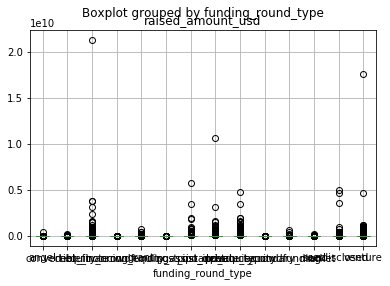

In [405]:
#trails queries for plots. can be ignored
import matplotlib.pyplot as plt
import seaborn as sbs
#tips = sbs.load_dataset("mf_sum")
#ax = sbs.boxplot(x="funding_round_type", y ='raised_amount_usd', data = tips )
boxplot = master_frame.boxplot(by = 'funding_round_type', column = ['raised_amount_usd'])

Text(0, 0.5, 'in millions')

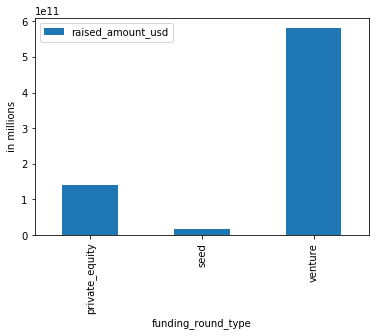

In [673]:
#Ploting total investment based on investment type
mf_venture5= master_frame.loc[(master_frame.funding_round_type == 'venture')|(master_frame.funding_round_type == 'seed')|(master_frame.funding_round_type == 'private_equity') ]
#mf_venture5
gp1 = mf_venture5.groupby(['funding_round_type']).sum()
#gp2 = master_frame.groupby(['funding_round_type']).mean()
#gp1
gp1.plot.bar()
plt.ylabel('in millions')

Text(0, 0.5, 'in millions')

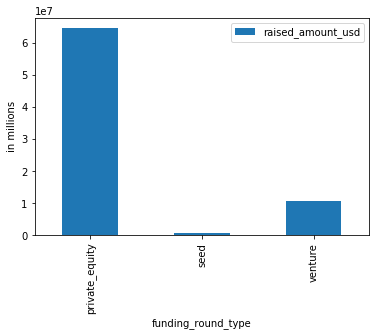

In [675]:
#Ploting mean investment based on investment type
mf_venture5= master_frame.loc[(master_frame.funding_round_type == 'venture')|(master_frame.funding_round_type == 'seed')|(master_frame.funding_round_type == 'private_equity') ]
#mf_venture5
#gp1 = mf_venture5.groupby(['funding_round_type']).sum()
gp2 = mf_venture5.groupby(['funding_round_type']).mean()
#gp1
gp2.plot.bar()
plt.ylabel('in millions')

ValueError: x and y must have same first dimension, but have shapes (500,) and (3, 1)

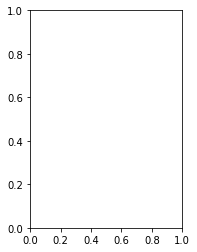

In [489]:
#trying to do sub plot. coluldn't succeed. can be ignored
x= np.linspace(10,10,500)
plt.figure(1)
plt.subplot(121)
plt.plot(x,gp1)

#subplot 2
#plt.subplot(122)
#plt.plot(x,gp2)

plt.show()

Text(0, 0.5, 'in millions')

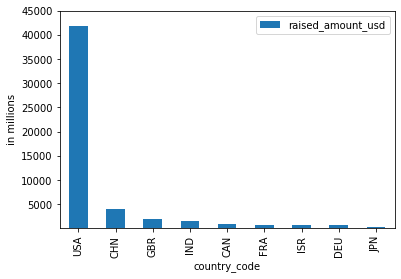

In [690]:
#plot 2. plot of top 9 countries based on investments
#top9.plot.bar()
#plt.ylim((5000000,100000000))
top9_plot = top9/10000000
#top9_plot
top9_plot.plot.bar()
plt.ylim((50,45000))
plt.ylabel ('in millions')

In [685]:
#THIS can be ignored. I was trying to plot top 3 using various methods
#top9.head()
#418595223442.00
#mf_venture.groupby('country_code').sum()
#plot_top3 = master_frame[(master_frame['funding_round_type'] == 'venture') ]
#plot_top3 = plot_top3.drop(index = 'NA')
#plot_top3.groupby(['country_code','main_sector']).sum().sort_values('raised_amount_usd', ascending = False)
#plot_top3 = plot_top3.drop(index = 'NA')
#plot_top3.head(50)
#.sort_values('raised_amount_usd', ascending = False)

raised_amount_usd
country_code main_sector                                               
USA          Cleantech / Semiconductors                 118834869645.00
             Social, Finance, Analytics, Advertising     86331402349.00
             Others                                      82822211972.00
             News, Search and Messaging                  45439636584.00
             Health                                      31675057766.00
             Manufacturing                               24845319470.00
             Entertainment                               17014560960.00
             Automotive & Sports                         11632164696.00
CHN          Social, Finance, Analytics, Advertising      9443388612.00
             Others                                       9265593610.00
             News, Search and Messaging                   6580728040.00
IND          Others                                       6329507440.00
GBR          Cleantech / Semiconductors                   5052849729.00
NA           Social, Finance, Analytics, Advertising      4606016934.00
GBR          Others                                       4492219646.00
CHN          Health                                       4402226232.00
NA           News, Search and Messaging                   4378263728.00
             Cleantech / Semiconductors                   3849515073.00
             Others                                       3833605645.00
GBR          Social, Finance, Analytics, Advertising      3773328672.00
CHN          Entertainment                                3486604384.00
             Manufacturing                                3424206239.00
GBR          News, Search and Messaging                   2956023749.00
CAN          Cleantech / Semiconductors                   2778422125.00
             Others                                       2319064563.00
             Social, Finance, Analytics, Advertising      2099427730.00
NA           Manufacturing                                2077818467.00
DEU          Cleantech / Semiconductors                   2056893180.00
CHE          Cleantech / Semiconductors                   1766964999.00
ISR          Cleantech / Semiconductors                   1743783092.00
...                                                                 ...
PHL          Entertainment                                      5000.00
CMR          Social, Finance, Analytics, Advertising            4561.00
BGD          Others                                             2000.00
CRI          News, Search and Messaging                            0.00
LTU          Manufacturing                                         0.00
GRC          Cleantech / Semiconductors                            0.00
LUX          Automotive & Sports                                   0.00
CYP          Cleantech / Semiconductors                            0.00
NOR          Automotive & Sports                                   0.00
CZE          Cleantech / Semiconductors                            0.00
MKD          News, Search and Messaging                            0.00
MOZ          Others                                                0.00
CZE          Health                                                0.00
ROM          News, Search and Messaging                            0.00
CMR          Others                                                0.00
PSE          Social, Finance, Analytics, Advertising               0.00
TTO          Manufacturing                                         0.00
RWA          Others                                                0.00
GHA          News, Search and Messaging                            0.00
JOR          Social, Finance, Analytics, Advertising               0.00
BMU          Health                                                0.00
SVK          Automotive & Sports                                   0.00
             Entertainment                                         0.00
HUN          Cleantech

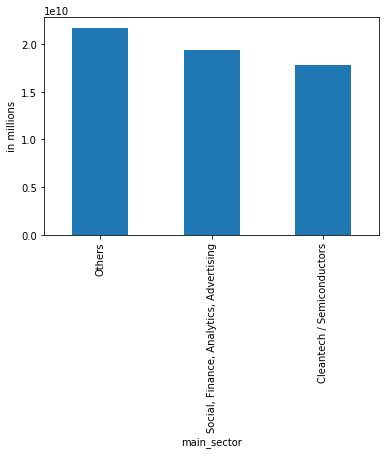

In [680]:
#Individual plot of USA
import seaborn as sns
d1_plot = d1.groupby('main_sector').sum().sort_values('raised_amount_usd', ascending = False).head(3)
d1_plot = d1_plot[('raised_amount_usd')]
#d1_plot
#d1_plot= d1_plot[0:1:1]
#d1_plot
plt.ylabel ('in millions')
plt.xlabel ('USA')
d1_plot.plot.bar()



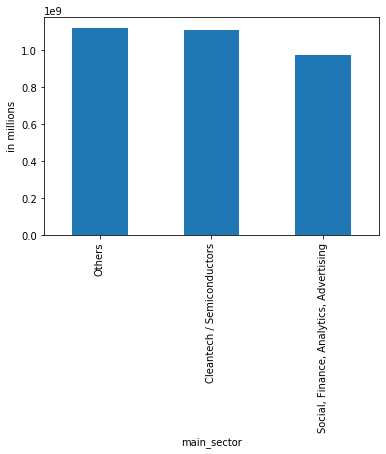

In [642]:
#Individual plot of GBR
d2_plot = d2.groupby('main_sector').sum().sort_values('raised_amount_usd', ascending = False).head(3)
d2_plot = d2_plot[('raised_amount_usd')]
plt.ylabel ('in millions')
d2_plot.plot.bar()


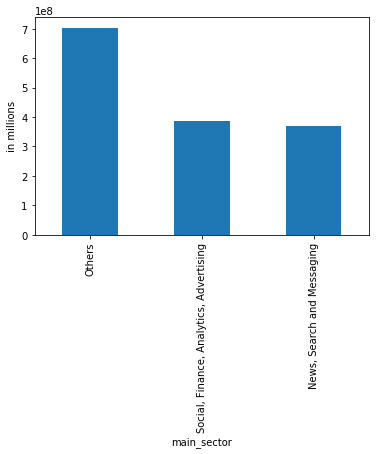

In [611]:
#Individual plot of IND
d3_plot = d3.groupby('main_sector').sum().sort_values('raised_amount_usd', ascending = False).head(3)
d3_plot = d3_plot[('raised_amount_usd')]
plt.ylabel ('in millions')
d3_plot.plot.bar()

In [658]:
#adding all country frames into one frame for final plot
frames1 = [d1,d2,d3]
frame_final = pd.concat(frames1)
#frame_final.count()


C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


category_list              10744
city                       10744
company_permalink          10744
country_code               10744
founded_at                 10744
funded_at                  10744
funding_round_code         10744
funding_round_permalink    10744
funding_round_type         10744
homepage_url               10744
main_sector                10744
name                       10744
primary_sector             10744
raised_amount_usd          10744
region                     10744
state_code                 10744
status                     10744
0                          10744
totalNumber                 9942
sector_investm              9942
0_y                          802
dtype: int64

In [660]:
#filtering final plot for top 3 country and selective investment type
frame_final1 = frame_final[((frame_final['country_code'] == 'USA')|(frame_final['country_code'] == 'IND')|(frame_final['country_code'] == 'GBR') ) & ((frame_final['main_sector'] == 'Others')|(frame_final['main_sector'] == 'Social, Finance, Analytics, Advertising')|(frame_final['main_sector'] == 'Cleantech / Semiconductors')|(frame_final['main_sector'] == 'News, Search and Messaging'))]


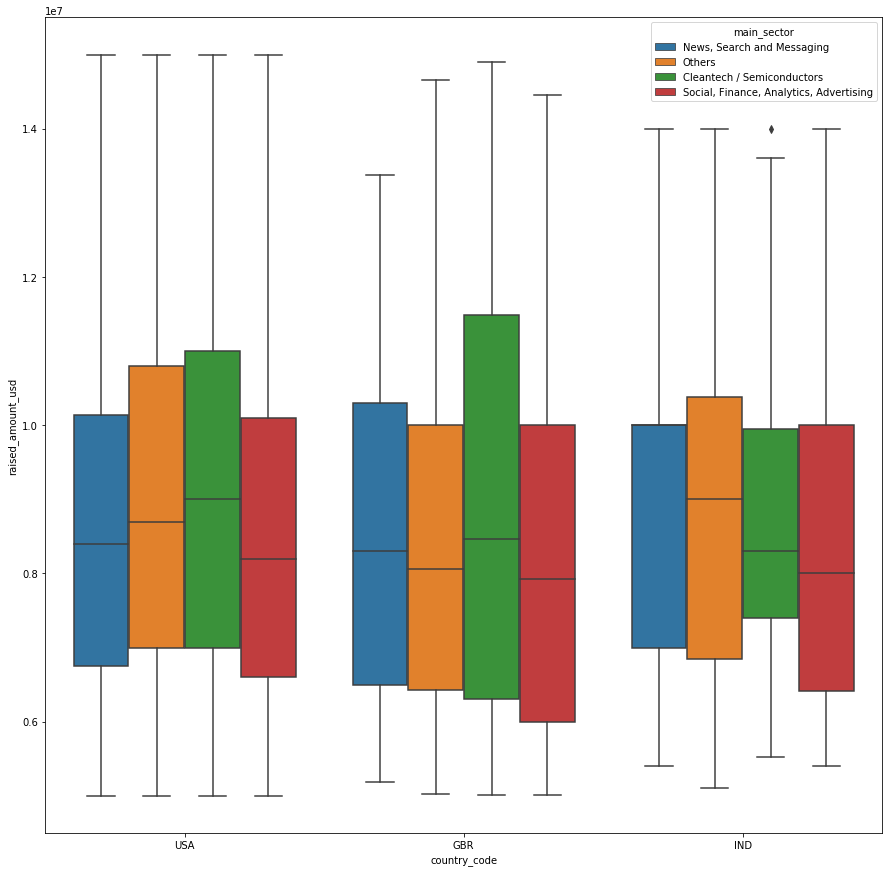

In [667]:
plt.figure(figsize=(15, 15))
plt.ylabel ('in millions')
plt.xlabel ('Country')

sns.boxplot(x = 'country_code', y =  'raised_amount_usd', hue = 'main_sector', data =frame_final1 )
